# Solar superstorm (G5) after effects on Starlink

In [1]:
import sys

# Add the project PATH
PATH = "/mnt/Storage/Projects/CosmicDance"
sys.path.append(PATH)

In [2]:
from cosmic_dance.dst_index import *
from cosmic_dance.io import *
from cosmic_dance.stack_plots import *
from cosmic_dance.TLEs import *

### Total satellites tracked per day during the event

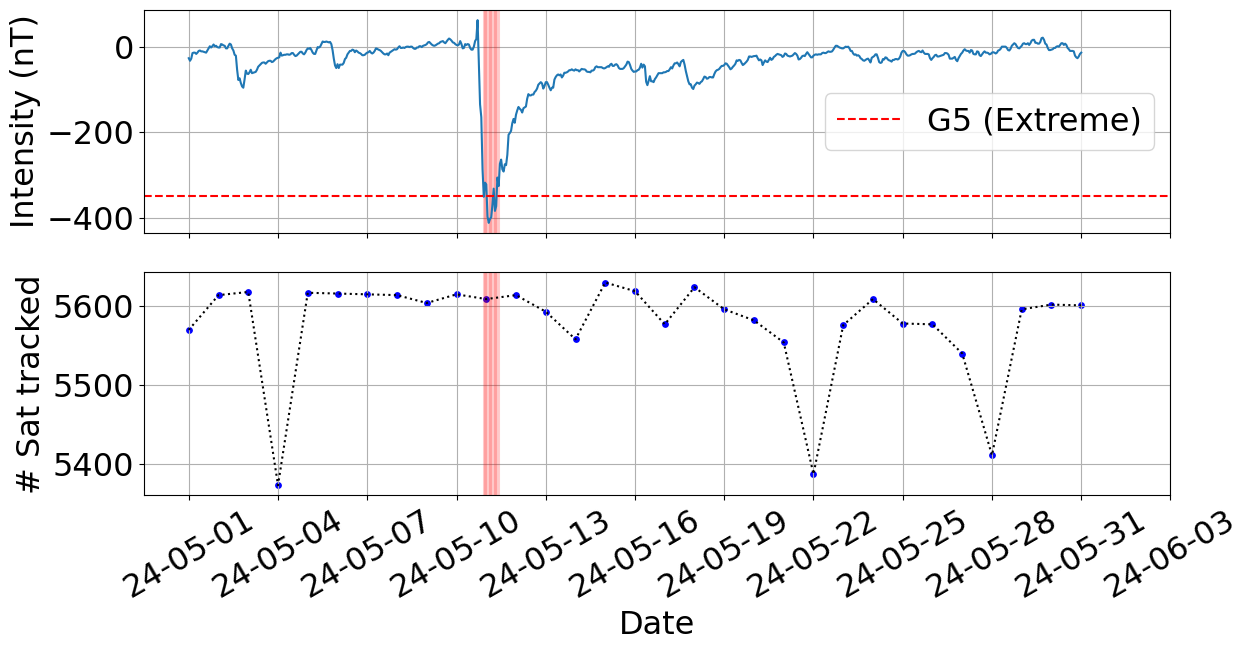

In [3]:
# Dataset
df = pd.read_csv("../../artifacts/OUTPUT/Starlink/measurement/tracking_anomaly/sat_tracked.csv")
df["DAY"] = pd.to_datetime(df["DAY"])

df_dst = read_dst_index_CSV("../../artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = df_dst[df_dst[DST.TIMESTAMP].between(
    df.iloc[0]["DAY"], df.iloc[-1]["DAY"])]


# Params
plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
for nt, t in zip(df_dst[DST.NANOTESLA], df_dst[DST.TIMESTAMP]):
    if -300.0 >= nt:
        axs[0].axvline(x=t, color='r', linestyle='-', alpha=0.2)
        axs[1].axvline(x=t, color='r', linestyle='-', alpha=0.2)

axs[0].plot(df_dst[DST.TIMESTAMP], df_dst[DST.NANOTESLA])
axs[0].axhline(
    y=-350.0,
    color='r',
    linestyle='--',
    label='G5 (Extreme)'
)

axs[1].scatter(
    df["DAY"], df["UNIQUE_SAT"],
    s=15,
    c='b'
)
axs[1].plot(
    df["DAY"], df["UNIQUE_SAT"],
    linestyle='dotted',
    c='black'
)


# Scaling and marking
axs[-1].set_xticks(
    get_date_marks(
        df["DAY"].iloc[0],
        df["DAY"].iloc[-1],
        pd.Timedelta(days=3)
    ),
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=30)
axs[-1].set_xlabel('Date')

axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('# Sat tracked')

axs[0].grid()
axs[1].grid()

axs[0].legend()

# Viewing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y-%m-%d"))
plt.tight_layout()
plt.show()

### Total TLE update per satellite during the event

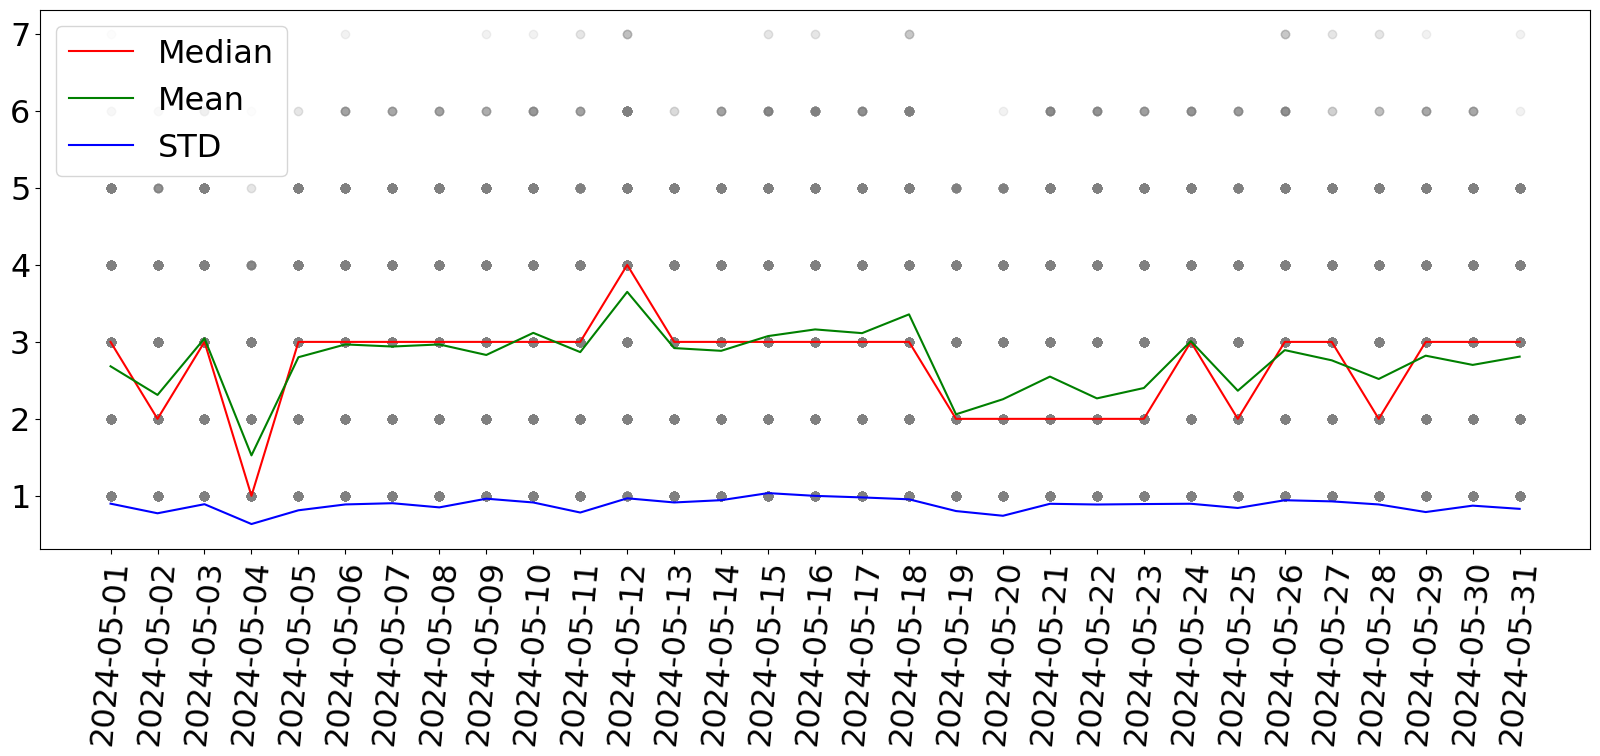

In [4]:
# Dataset
df = pd.read_csv("../../artifacts/OUTPUT/Starlink/measurement/tracking_anomaly/tle_per_sat.csv")

median_per_day = []
for day in df["DAY"].unique():
    df_of_the_day = df[df["DAY"] == day]
    median_per_day.append({
        "DAY": day,
        "MEDIAN": df_of_the_day["TOTAL_TLE"].median(),
        "MEAN": df_of_the_day["TOTAL_TLE"].mean(),
        "STD": df_of_the_day["TOTAL_TLE"].std(),
    })
df_median_per_day = pd.DataFrame.from_dict(median_per_day)
df_median_per_day["DAY"] = pd.to_datetime(df_median_per_day["DAY"])

df["DAY"] = pd.to_datetime(df["DAY"])


# Params
plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
for cat_id in df["NORAD_CAT_ID"].unique():
    df_of_cat_id = df[df["NORAD_CAT_ID"] == cat_id]

    plt.scatter(
        df_of_cat_id["DAY"], df_of_cat_id["TOTAL_TLE"],
        alpha=0.1,
        c='gray'
    )


plt.plot(
    df_median_per_day["DAY"], df_median_per_day["MEDIAN"],
    c='r',
    label='Median'
)
plt.plot(
    df_median_per_day["DAY"], df_median_per_day["MEAN"],
    c='g',
    label='Mean'
)
plt.plot(
    df_median_per_day["DAY"], df_median_per_day["STD"],
    c='b',
    label='STD'
)


plt.legend()
plt.xticks(df["DAY"].unique(), rotation=85)
plt.show()

## Drag analysis during G5 event

### Positive drag VS negative drag VS total TLEs

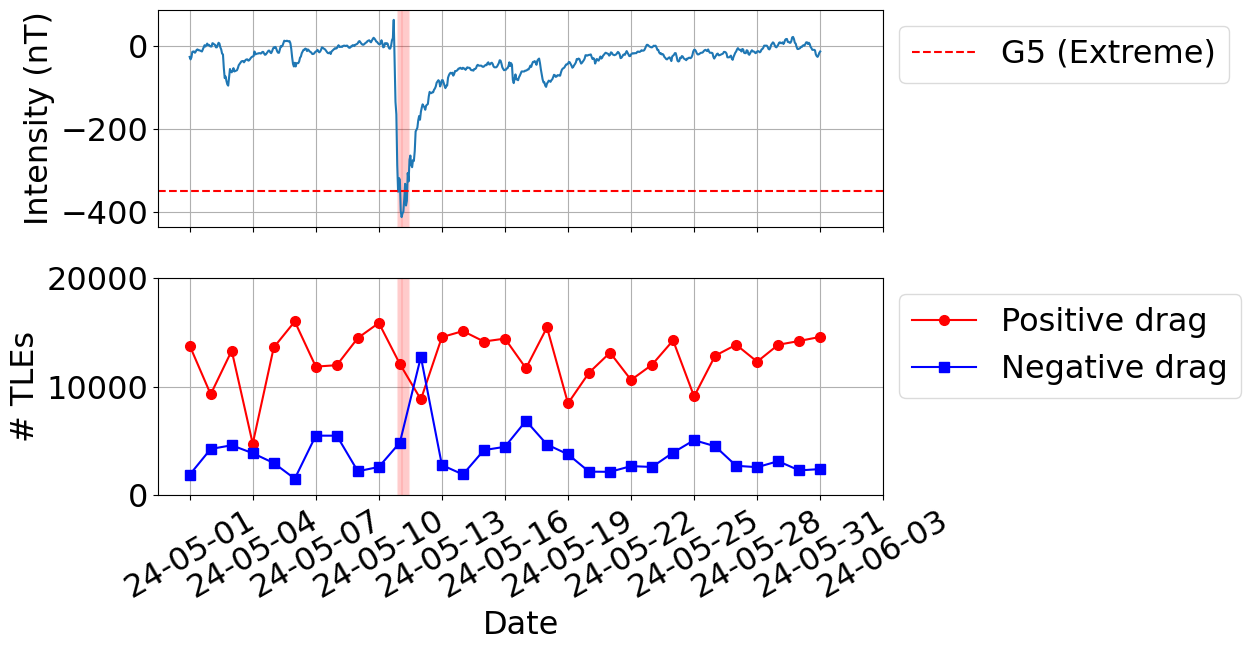

In [6]:
# Dataset
df = pd.read_csv("../../artifacts/OUTPUT/Starlink/measurement/drag_anomaly/drag_observed.csv")
df["DAY"] = pd.to_datetime(df["DAY"])

df_dst = read_dst_index_CSV("../../artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = df_dst[df_dst[DST.TIMESTAMP].between(df.iloc[0]["DAY"], df.iloc[-1]["DAY"])]


# Params
plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
for nt, t in zip(df_dst[DST.NANOTESLA], df_dst[DST.TIMESTAMP]):
    if -300.0 >= nt:
        # print(nt)
        axs[0].axvline(x=t, color='r', linestyle='-', alpha=0.1)
        axs[1].axvline(x=t, color='r', linestyle='-', alpha=0.1)

axs[0].plot(df_dst[DST.TIMESTAMP], df_dst[DST.NANOTESLA])
axs[0].axhline(y=-350.0, color='r', linestyle='--', label='G5 (Extreme)')


# axs[1].plot(df["DAY"], df["TOTAL_TLE"], label='TOTAL TLE')
axs[1].plot(
    df["DAY"], df["POSITIVE_DRAG"], 
    label='Positive drag',
    color='r',
    marker='o',
    ms=7
)
axs[1].plot(
    df["DAY"], df["NEGATIVE_DRAG"],
    color='b',
    label='Negative drag',
    marker='s',
    ms=7
)

# Scaling and marking
axs[-1].set_xticks(
    get_date_marks(
        df["DAY"].iloc[0],
        df["DAY"].iloc[-1],
        pd.Timedelta(days=3)
    ),
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=30)
axs[-1].set_xlabel('Date')

axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('# TLEs')

axs[1].set_ylim(0, 20000)


axs[0].grid()
# axs[i].legend(framealpha=0.2)
axs[0].legend(framealpha=0.7, bbox_to_anchor=(1, 1))

axs[1].grid()
# axs[i].legend(framealpha=0.2)
axs[1].legend(framealpha=0.7, bbox_to_anchor=(1, 1))

# Viewing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.tight_layout()
plt.show()

### Drag value (+ve) increases

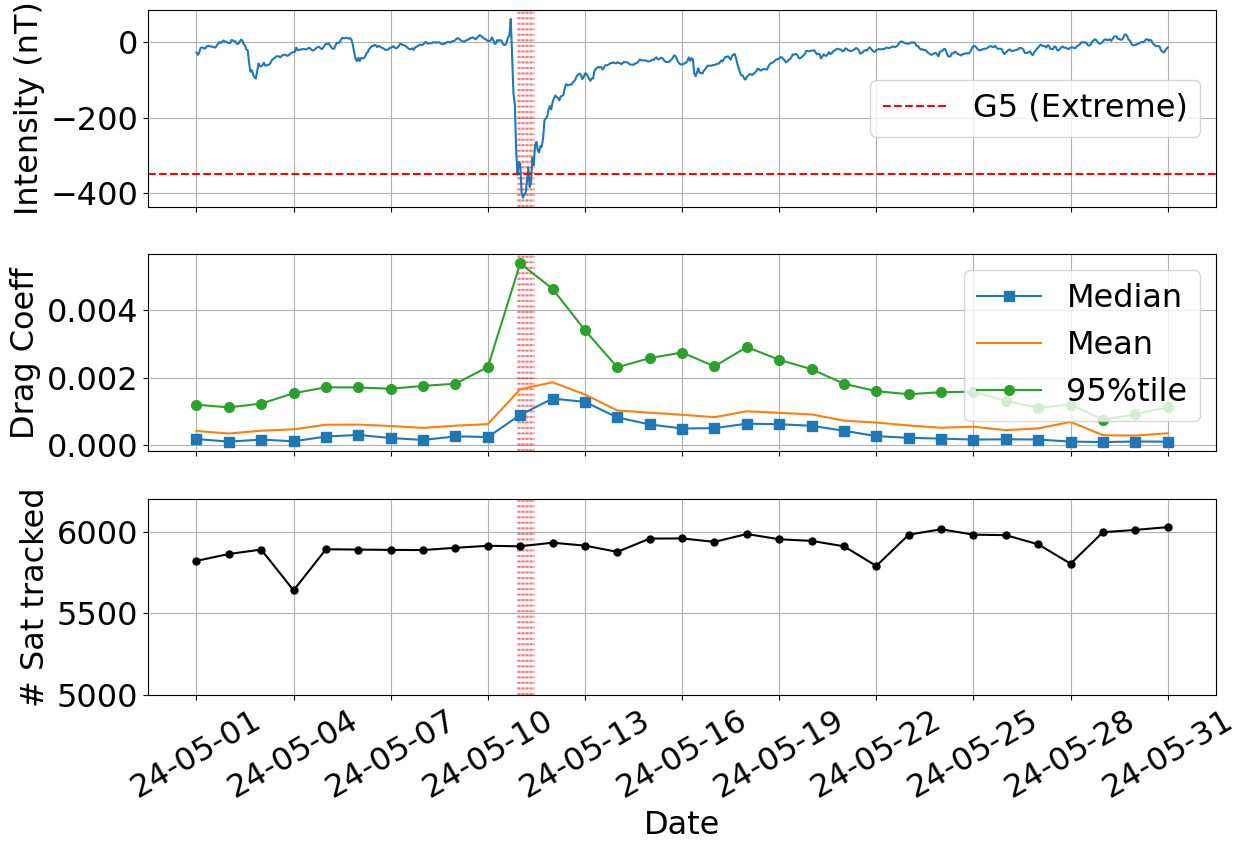

In [7]:
# Dataset
df = pd.read_csv("../../artifacts/OUTPUT/Starlink/measurement/drag_anomaly/positive_drag_observed.csv")
df["DAY"] = pd.to_datetime(df["DAY"])

df_sat_tracked = pd.read_csv("../../artifacts/OUTPUT/Starlink/measurement/tracking_anomaly/sat_tracked.csv")
df_sat_tracked["DAY"] = pd.to_datetime(df_sat_tracked["DAY"])


df_dst = read_dst_index_CSV("../../artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = df_dst[df_dst[DST.TIMESTAMP].between(
    df.iloc[0]["DAY"], df.iloc[-1]["DAY"])]


# Params
plt.rcParams["figure.figsize"] = (13, 9)
plt.rcParams.update({'font.size': 23})


# Plotting
fig, axs = plt.subplots(3, 1, sharex=True)
for nt, t in zip(df_dst["nT"], df_dst["TIMESTAMP"]):
    if -300.0 >= nt:
        # print(nt)
        axs[0].axvline(x=t, color='r', linestyle='dotted', alpha=0.3)
        axs[1].axvline(x=t, color='r', linestyle='dotted', alpha=0.3)
        axs[2].axvline(x=t, color='r', linestyle='dotted', alpha=0.3)

axs[0].plot(df_dst[DST.TIMESTAMP], df_dst[DST.NANOTESLA])
axs[0].axhline(y=-350.0, color='r', linestyle='--', label='G5 (Extreme)')

# axs[1].plot(df["DAY"], df["MAX"],  linestyle='dotted', c='r', label='MAX DRAG')
# axs[1].plot(df["DAY"], df["MIN"],  linestyle='dotted', c='g', label='MAX DRAG')

axs[1].plot(
    df["DAY"], df["MEDIAN"],
    label='Median',
    marker='s',
    ms=7
)
axs[1].plot(
    df["DAY"], df["MEAN"],
    label='Mean'
)
axs[1].plot(
    df["DAY"], df["P95"],
    label='95%tile',
    marker='o',
    ms=7
)

axs[2].plot(
    df_sat_tracked["DAY"], df_sat_tracked["UNIQUE_SAT"],
    marker='o',
    c='black',
    ms=5
)

# Scaling and marking
axs[-1].set_xticks(
    get_date_marks(
        df["DAY"].iloc[0],
        df["DAY"].iloc[-2],
        pd.Timedelta(days=3)
    ),
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=30)
axs[-1].set_xlabel('Date')

axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('Drag Coeff')
axs[2].set_ylabel('# Sat tracked')

axs[2].set_ylim(5000, 6200)

for i in range(3):
    axs[i].grid()
for i in range(2):
    axs[i].legend(bbox_to_anchor=(1, 1))

# Viewing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.tight_layout()
# plt.savefig("/home/suvam/Projects/CosmicDance/figures/G5/PositiveDragIncreaseDuringStormSatTrackPerDay.png", dpi=300)
plt.show()